<a href="https://colab.research.google.com/github/Violonista/Taxa-de-crescimento-do-PIB-Brasileiro/blob/main/Taxas_de_crescimento_do_PIB_Brasileiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Taxas de crescimento do PIB Brasileiro**
## **1º trimestre de 1996 ao 4º trimestre de 2020**

#### **Autor: Joel Victor**


##  Para o propósito desta atividade, escolhi usar o SGS - Sistema Gerenciador de Séries Temporais do Banco Central do Brasil como fonte de dados. Ao visitar o site do SGS, deparei-me com as seguintes tabelas referentes ao PIB brasileiro:


> 

*   **PIB - Trimestral Dados observados - Valor adicionado a preços básicos**;

*   **PIB - Trimestral Dados observados - Produto Interno Bruto a preços de mercado**;
*   **PIB trimestral - Dados dessazonalizados - Valor adicionado a preços básicos**;
*   **PIB trimestral - Dados dessazonalizados - Produto Interno Bruto a preços de mercado**.




Depois de algumas pesquisas resolvi usar o **PIB trimestral - Dados dessazonalizados - Produto Interno Bruto a preços de mercado (SCN-2010)**.

Em primeiro lugar, o PIB é o indicador mais amplamente utilizado para medir o desempenho econômico de um país, pois representa o valor total de todos os bens e serviços finais produzidos dentro das fronteiras de um país durante um determinado período de tempo. Isso significa que ele é uma medida abrangente e representativa do crescimento econômico.

Além disso, os **dados dessazonalizados** são importantes porque removem as flutuações sazonais que ocorrem regularmente ao longo do ano, permitindo que a tendência subjacente do crescimento econômico seja mais claramente identificada. Isso é particularmente importante quando se trata de análise de dados macroeconômicos, pois as variações sazonais podem obscurecer a verdadeira tendência de crescimento.

**SCN-2010** é a sigla para Sistema de Contas Nacionais de 2010, que é um conjunto de normas e diretrizes estabelecidas pelas Nações Unidas para padronizar as contas nacionais em todo o mundo. O SCN-2010 inclui um conjunto de regras para a definição e mensuração do PIB, bem como outras medidas econômicas importantes.

Por fim, o uso do **Produto Interno Bruto a preços de mercado** é justificado porque ele representa o valor total de todos os bens e serviços finais produzidos dentro das fronteiras de um país durante um determinado período de tempo, independentemente de serem destinados para consumo interno ou exportação. Isso significa que o PIB a preços de mercado é uma medida abrangente e representativa do crescimento econômico de um país.

A diferença entre o PIB trimestral dessazonalizado a preços básicos e a preços de mercado é a forma como os preços são medidos na economia. O PIB a preços básicos mede o valor adicionado pelos produtores, ou seja, o valor gerado pela produção de bens e serviços, excluindo os impostos sobre a produção e adicionando subsídios recebidos pelos produtores. Já o PIB a preços de mercado mede o valor de mercado dos bens e serviços produzidos, incluindo os impostos sobre a produção e excluindo os subsídios recebidos pelos produtores.

Ambas as medidas são importantes para análise das taxas de crescimento, dependendo do objetivo específico da análise. O PIB a preços básicos é útil para analisar o desempenho dos produtores na economia, enquanto o PIB a preços de mercado é útil para medir a demanda agregada na economia. Em geral, o PIB a preços de mercado é considerado o melhor indicador para análise das taxas de crescimento, pois reflete mais diretamente o valor total da produção e é mais relevante para a tomada de decisões econômicas.

In [4]:
#Importando as bibliotecas
#Caso não tenha o biblioteca python-bcb:
#!pip install python-bcb
from bcb import sgs
import pandas as pd
from matplotlib import pyplot as plt
import seaborn
from matplotlib import ticker as mtick

In [5]:
#request da série temporal do PIB
pib_tri = sgs.get({'PIB Trimestral': 22109},
                   start= '1995-01-01',
                   end= '2022-07-01')

In [6]:
#verificando o dataframe gerado
pib_tri.head()

,PIB Trimestral
Date,
1996-01-01,99.44
1996-04-01,100.57
1996-07-01,104.32
1996-10-01,103.32
1997-01-01,104.40


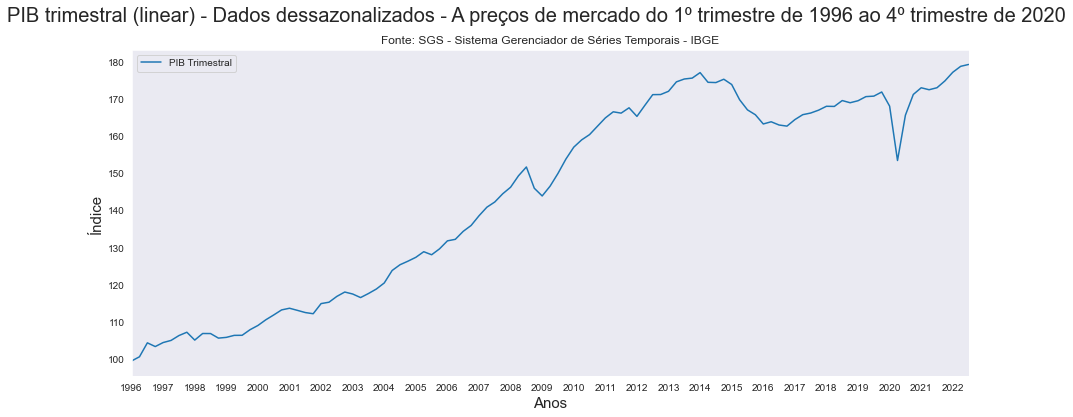

In [10]:
# plotando o gráfico
seaborn.set_style('dark')
fig, ax = plt.subplots(figsize =(15,6))
pib_tri.plot(ax=ax)
fig.suptitle('PIB trimestral (linear) - Dados dessazonalizados - A preços de mercado do 1º trimestre de 1996 ao 4º trimestre de 2020',
             fontsize=20)
ax.set_title('Fonte: SGS - Sistema Gerenciador de Séries Temporais - IBGE')
ax.set_ylabel('Índice', fontsize=15)
ax.set_xlabel('Anos', fontsize=15)


#Como temos muitos dados no eixo x é interessante  considerar agrupar os dados em intervalos maiores,
#Agrupando os dados em intervalos de 4 trimestres (1 ano) e mostrar somente os anos no eixo x.

ax.set_xticks(pib_tri.index[::4])
ax.set_xticklabels(pib_tri.index.strftime('%Y')[::4])
plt.show()



## **Agora vamos calcular as taxas de crescimento** 

In [13]:
# criando um objeto do tipo series do pandas com as taxas de crescimento

tx_cresc = pib_tri['PIB Trimestral'].pct_change() * 100
tx_cresc

Date
1996-01-01         NaN
1996-04-01    1.136364
1996-07-01    3.728746
1996-10-01   -0.958589
1997-01-01    1.045296
                ...   
2021-07-01    0.313189
2021-10-01    1.058048
2022-01-01    1.333028
2022-04-01    0.903342
2022-07-01    0.279767
Name: PIB Trimestral, Length: 107, dtype: float64

In [14]:
#dropando o valor nulo

tx_cresc.dropna(inplace=True)
tx_cresc

Date
1996-04-01    1.136364
1996-07-01    3.728746
1996-10-01   -0.958589
1997-01-01    1.045296
1997-04-01    0.545977
                ...   
2021-07-01    0.313189
2021-10-01    1.058048
2022-01-01    1.333028
2022-04-01    0.903342
2022-07-01    0.279767
Name: PIB Trimestral, Length: 106, dtype: float64

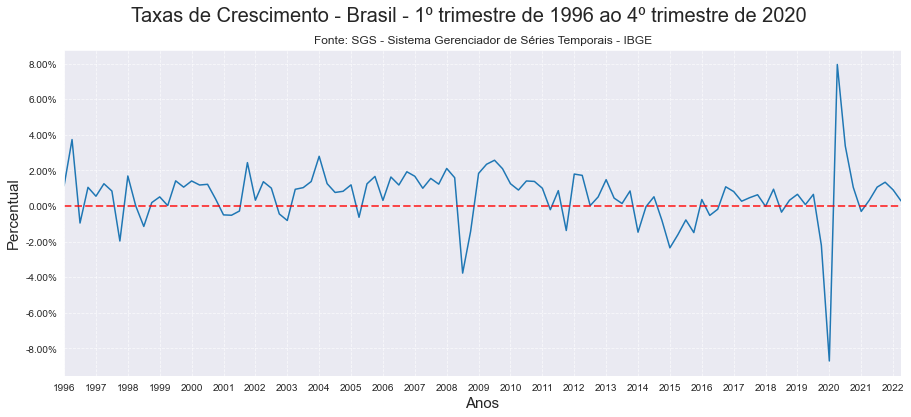

In [17]:
# plotando gráfico das taxas de crescimento

fig, ax = plt.subplots(figsize=(15,6))
tx_cresc.plot(ax=ax)
fig.suptitle('Taxas de Crescimento - Brasil - 1º trimestre de 1996 ao 4º trimestre de 2020',
             fontsize=20)
ax.set_title('Fonte: SGS - Sistema Gerenciador de Séries Temporais - IBGE')
ax.set_xlabel('Anos', size=15)
ax.set_ylabel('Percentual', size=15)

# Criando uma linha horizontal
ax.axhline(y=0, color='r', linestyle='--', linewidth=2, alpha=0.7)

# Adicionando a grade ao fundo do gráfico
ax.grid(True, linestyle='--', alpha=0.7)

# Espaçamento do eixo x
ax.set_xticks(tx_cresc.index[::4])
ax.set_xticklabels(tx_cresc.index.strftime('%Y')[::4])

# Espaçamento do eixo y

# Define a porcentagem na formatação
fmt = '%.2f%%'

#Configura o objeto de formatação do eixo y
yticks = mtick.FormatStrFormatter(fmt)

# Aplica o objeto de formatação no eixo y
ax.yaxis.set_major_formatter(yticks)

# Define o espaçamento do eixo y em 2%
ax.yaxis.set_major_locator(mtick.MultipleLocator(2))


plt.show()